In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [53]:
df=pd.read_csv("C:\\Users\\user\\boston housing dataset\\boston.csv")
df_min=df.min()
df_max=df.max()
df_norm=(df-df_min)/(df_max-df_min)


In [54]:
bias_arr=pd.DataFrame(1 for _ in range(506))
param=pd.concat([bias_arr,df_norm],axis=1)
param_new=param[[0,'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PT','B','LSTAT']].values
op=param[['MV']].values


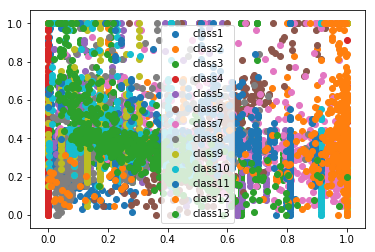

In [55]:
for s in range(1,14):
    plt.scatter(param_new[:,s],op,label='class'+str(s))
plt.legend()
plt.show()

In [56]:
def hypothesis(theta,param_train):
    return np.dot((param_train),theta)

In [57]:
def loss(theta,param_train,op_train):
    param_predict=hypothesis(theta,param_train)
    loss_arr=((np.sum((param_predict-op_train)**2))/(2*len(param_predict)))
    return param_predict,loss_arr

In [58]:
def grad_descent(theta,alpha,op_train,param_train,param_test,op_test):
    param_predict,loss_arr=loss(theta,param_train,op_train)
    etrain_rmse=[]
    etest_rmse=[]
    rmse_reg=[]
    itr=[]
    for i in range (10000):
        theta=theta-alpha*((np.dot(param_train.T,(param_predict-op_train)))/len(param_predict))
        param_predict,loss_arr=loss(theta,param_train,op_train)
        errortrain_rmse=rmse(param_predict,op_train)
        etrain_rmse.append(errortrain_rmse)
        itr.append(i)
        test_predict, losstest_arr=loss(theta,param_test,op_test)
        errortest_rmse=rmse(test_predict,op_test)
        etest_rmse.append(errortest_rmse)
    rmse_reg.append(errortest_rmse)
    return etrain_rmse,etest_rmse,itr,theta
    
    

In [59]:
def rmse(predicted,op_train):
    return (((np.sum((predicted-op_train)**2))/len(predicted))**0.5)

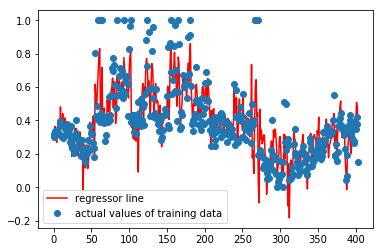

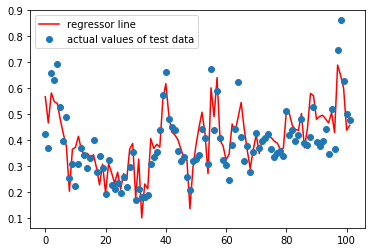

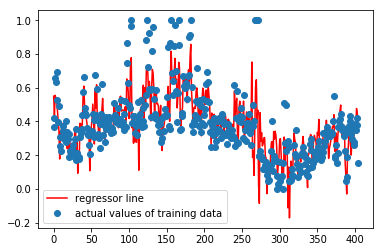

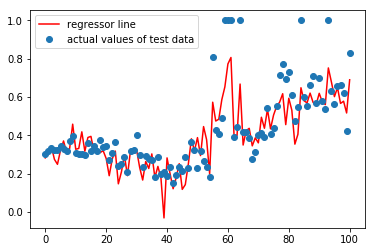

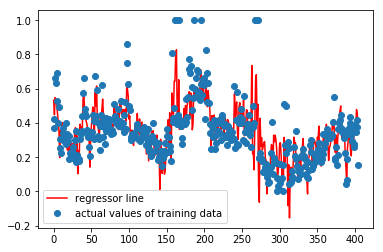

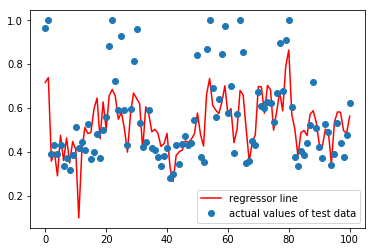

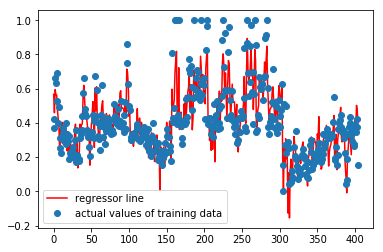

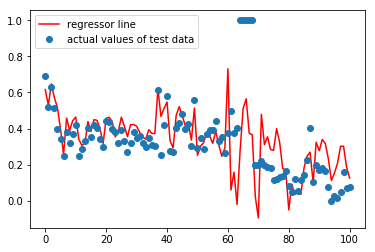

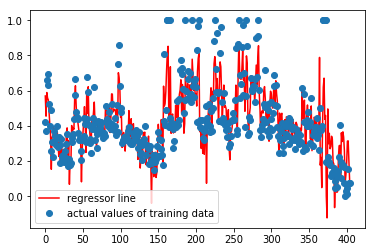

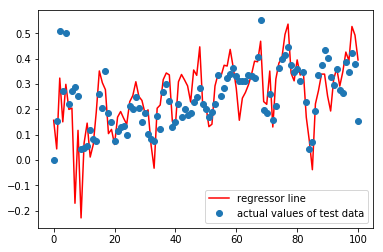

[0.06785506959415158, 0.1051951670815401, 0.12788028079556638, 0.1782277541542233, 0.09819444905112894]


In [96]:
from sklearn.model_selection import KFold
kfold_itr=KFold(n_splits=5)
kfold_itr.get_n_splits(param_new)
alpha=0.009
train_indices=[]
test_indices=[]
trainop_indices=[]
testop_indices=[]
mean_train=[]
mean_test=[]
std_train=[]
std_test=[]
plot_train=[]
plot_test=[]
model_nonreg=[]
rmse_trainmodel=[]
for train_index, test_index in kfold_itr.split(param_new):
    param_train,param_test=param_new[train_index],param_new[test_index]
    op_train,op_test=op[train_index],op[test_index]
    train_indices.append(param_train)
    test_indices.append(param_test)
    trainop_indices.append(op_train)
    testop_indices.append(op_test)
    #gradient descent
    theta=np.zeros((14,1))
    etrain,etest,itr,theta=grad_descent(theta,alpha,op_train,param_train,param_test,op_test)
    
    #model
    model_nonreg.append(theta)
    
    #predicted parmaters
    param_predict=hypothesis(theta,param_test)
    param_predict1=hypothesis(theta,param_train)
    plt.plot(param_predict1,'r-',label='regressor line')
    plt.plot(op_train,'o',label='actual values of training data')
    plt.legend()
    plt.show()
    plt.plot(param_predict,'r-',label='regressor line')
    plt.legend()
    plt.plot(op_test,'o',label='actual values of test data')
    plt.legend()
    plt.show()
    
    
    #rmse
    rmse_trainedmodel=rmse(param_predict,op_test)
    rmse_trainedmodel1=rmse(param_predict1,op_train)
    
    # mean and standard deviation on training and test set
    plot_train.append(etrain)
    plot_test.append(etest)
    mean_training=np.mean(etrain)
    mean_train.append(mean_training)
    mean_testing=np.mean(etest)
    mean_test.append(mean_testing)
    std_training=np.std(etrain)
    std_train.append(std_training)
    std_testing=np.std(etest)
    std_test.append(std_testing)
#     print("Mean RMSE on training:",mean_training)
#     print("Standard Deviation on training:",std_training)
#     print('RMSE error on training data:',rmse_trainedmodel1,'\n\n')
    
#     print("Mean RMSE on testing:",mean_testing)
#     print("Standard Deviation on testing:",std_testing)
#     print('RMSE error on testing data:',rmse_trainedmodel,'\n\n')
    rmse_trainmodel.append(rmse_trainedmodel)
print(rmse_trainmodel) 


    
   
    

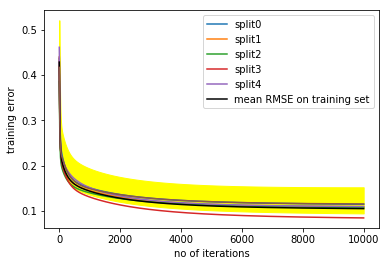

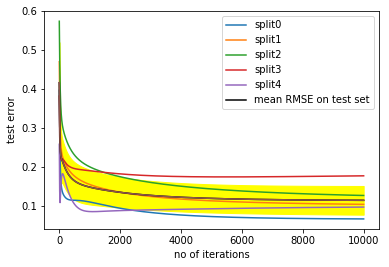

In [61]:
train_mean=[]
train_std=[]
for a in range(0,10000):
    m=0
    val=[]
    for b in range(0,5):
        m+=plot_train[b][a]
        val.append(plot_train[b][a])
    train_std.append(np.std(val))
    mean=m/5.0
    train_mean.append(mean)        
plt.xlabel("no of iterations")
plt.ylabel("training error")
for i in range(0,5):
    plt.plot(itr,plot_train[i],label="split"+str(i))
plt.plot(itr,train_mean,label="mean RMSE on training set",color='black')
plt.legend()
# plt1=plt.twinx()
# plt1.plot(itr,train_std,label="Std on training set",color='black')
# plt.legend(loc='right')
train_mean=np.asarray(train_mean)
train_std=np.asarray(train_std)
plt.plot(test_mean)
plt.fill_between(itr, train_mean-train_std, test_mean+test_std,color='yellow')
plt.show()
test_mean=[]
test_std=[]
for c in range(0,10000):
    m=0
    val=[]
    for d in range(0,5):
        m+=plot_test[d][c]
        val.append(plot_test[d][c])
    test_std.append(np.std(val))
    mean=m/5.0
    test_mean.append(mean)      
plt.xlabel("no of iterations")
plt.ylabel("test error")
for j in range(0,5):
    plt.plot(itr,plot_test[j],label="split"+str(j))
plt.plot(itr,test_mean,label="mean RMSE on test set",color='black')
plt.legend()
# plt2=plt.twinx()
# plt2.plot(itr,test_std,label="Std on test set",color='black')
# plt.legend(loc='right')
test_mean=np.asarray(test_mean)
test_std=np.asarray(test_std)
plt.plot(test_mean)
plt.fill_between(itr, test_mean-test_std, test_mean+test_std,color='yellow')
plt.show()

In [62]:
min_rmse=rmse_trainmodel[0]
fold=0
for i in range(1,5):
    if(min_rmse>rmse_trainmodel[i]):
        min_rmse=rmse_trainmodel[i]
        fold=i

In [63]:
print(fold)

0


In [64]:
print(train_indices[1].shape)

(405, 14)


In [65]:
trainval_array=np.array(train_indices[fold],copy=True)
test_array=np.array(test_indices[fold],copy=True)
trainvalop_array=np.array(trainop_indices[fold],copy=True)
testop_array=np.array(testop_indices[fold],copy=True)

In [66]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
def ridgegrd_search(param_train,op_train):
    reg=Ridge()
    parameters={'alpha':[0.01,0.03,0.09,0.27,0.81,0.001,0.003]}
    gs=GridSearchCV(reg,parameters,cv=5)
    gs.fit(param_train,op_train) 
    return gs.best_params_['alpha']
def lassogrd_search(param_train,op_train):
    reg=Lasso()
    parameters={'alpha':[0.01,0.03,0.09,0.27,0.81,0.001,0.003]}
    lgs=GridSearchCV(reg,parameters,cv=5)
    lgs.fit(param_train,op_train)
    return lgs.best_params_['alpha']
    

In [69]:
def l2grad_desc(param_train,op_train,lbda,theta,alpha,param_test,op_test):
    parampredict,lossarr=loss(theta,param_train,op_train)
    etrainrmse=[]
    etestrmse=[]
    itr=[]
    for i in range (100000):
        theta=theta-alpha*((np.dot(param_train.T,(parampredict-op_train)))/len(parampredict)+ np.multiply(lbda,theta))
        parampredict,lossarr=loss(theta,param_train,op_train)
        errortrainrmse=rmse(parampredict,op_train)
        etrainrmse.append(errortrainrmse)
        
        parampredict1,lossarr1=loss(theta,param_test,op_test)
        errortestrmse=rmse(parampredict1,op_test)
        etestrmse.append(errortestrmse)
        
        itr.append(i)
    return etrainrmse,etestrmse,itr,theta
           

Mean RMSE on training set 0.19149221812935077
STD on training set 0.005911095918420557
Mean RMSE on test set 0.12243693974514473
STD on test set 0.006125433662030049


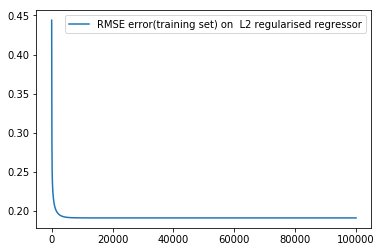

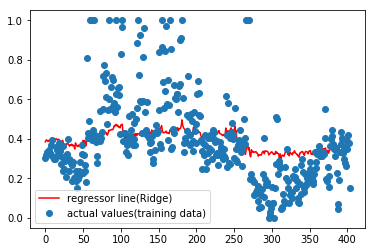

RMSE error on Train Set: 0.19088930895374845
RMSE error on Test Set: 0.12214266978217964


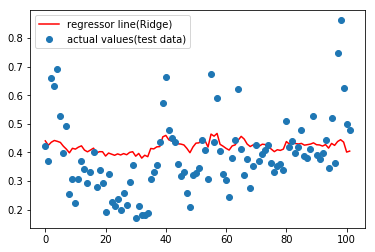

In [101]:
theta=np.full((14,1),0)
lda=ridgegrd_search(trainval_array,trainvalop_array)
lbda=np.full((14,1),lda)
lbda[0]=0
alpha=0.003
error_train,error_test,itr,theta=l2grad_desc(trainval_array,trainvalop_array,lbda,theta,alpha,test_array,testop_array)
print("Mean RMSE on training set",np.mean(error_train))
print("STD on training set",np.std(error_train))
print("Mean RMSE on test set",np.mean(error_test))
print("STD on test set",np.std(error_test))
plt.plot(itr,error_train,label='RMSE error(training set) on  L2 regularised regressor')
plt.legend()
plt.show()
param_trainpredicted=hypothesis(theta,trainval_array)
plt.plot(param_trainpredicted,'r-',label='regressor line(Ridge)')
plt.legend()
plt.plot(trainvalop_array,'o',label='actual values(training data)')
plt.legend()
plt.show()
print("RMSE error on Train Set:",rmse(param_trainpredicted,trainvalop_array))
param_testpredicted=hypothesis(theta,test_array)
print("RMSE error on Test Set:",rmse(param_testpredicted,testop_array))
plt.plot(param_testpredicted,'r-',label='regressor line(Ridge)')
plt.legend()
plt.plot(testop_array,'o',label='actual values(test data)')
plt.legend()
plt.show()

In [102]:
def l1grad_desc(param_train,op_train,lbda,theta,alpha,param_test,op_test):
    parampredict,lossarr=loss(theta,param_train,op_train)
    etrainrmse=[]
    etestrmse=[]
    itr=[]
    for i in range (100000):
        theta=theta-alpha*((np.dot(param_train.T,(parampredict-op_train)))/len(parampredict)+lbda)
        parampredict,lossarr=loss(theta,param_train,op_train)
        errortrainrmse=rmse(parampredict,op_train)
        etrainrmse.append(errortrainrmse)
        
        parampredict1,lossarr1=loss(theta,param_test,op_test)
        errortestrmse=rmse(parampredict1,op_test)
        etestrmse.append(errortestrmse)
        itr.append(i)
    return etrainrmse,etestrmse,itr,theta
           

Mean RMSE training set 0.1258768197747016
STD on training set 0.02219555950393447
Mean RMSE test set 0.08111830126263463
STD on test set 0.01994976062169693


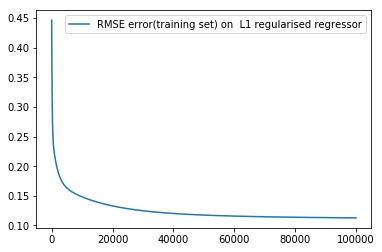

RMSE error on Train Set: 0.1127689140486284


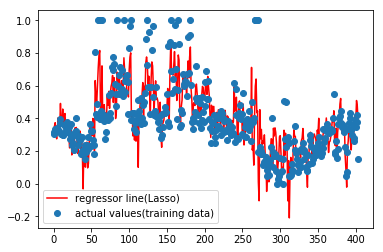

RMSE error on Test Set: 0.06940336974050677


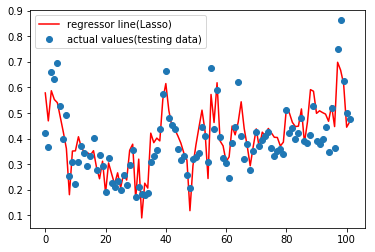

In [103]:
theta1=np.full((14,1),0)
lda1=lassogrd_search(trainval_array,trainvalop_array)
lbda1=np.full((14,1),lda1)
lbda1[0]=0
alpha1=0.001
errortrain,errortest,itr,theta1=l1grad_desc(trainval_array,trainvalop_array,lbda1,theta1,alpha1,test_array,testop_array)
print("Mean RMSE training set",np.mean(errortrain))
print("STD on training set",np.std(errortrain))

print("Mean RMSE test set",np.mean(errortest))
print("STD on test set",np.std(errortest))
plt.plot(itr,errortrain,label='RMSE error(training set) on  L1 regularised regressor')
plt.legend()
plt.show()
param_trainpredicted=hypothesis(theta1,trainval_array)
print("RMSE error on Train Set:",rmse(param_trainpredicted,trainvalop_array))
plt.plot(param_trainpredicted,'r-',label='regressor line(Lasso)')
plt.legend()
plt.plot(trainvalop_array,'o',label='actual values(training data)')
plt.legend()
plt.show()
param_testpredicted=hypothesis(theta1,test_array)
print("RMSE error on Test Set:",rmse(param_testpredicted,testop_array))
plt.plot(param_testpredicted,'r-',label='regressor line(Lasso)')
plt.legend()
plt.plot(testop_array,'o',label='actual values(testing data)')
plt.legend()
plt.show()